#Integrales por la regla del trapecio
\begin{equation}
A  = \frac{h}{2}(f(a) + f(b) + 2\sum_{i=1}^{n-1} f(x_i)) = \frac{h}{2}(f(a) + f(b)) + h\sum_{i=1}^{n-1} f(x_i)
\end{equation}

La integral de una función se define como el área de debajo de una curva, evaluada en un rango $[a,b]$, si se hace aproximación inicial armando el trapecio con una línea que une los puntos entre $a$ y $b$ por lo que el área de la curva sería:

$$\int_{a}^{b}f(x)dx \approx f(a)(b-a) + \frac{(b-a)(f(b)-f(a))}{2} = (b-a)\left(f(a) + \frac{(f(b)-f(a))}{2}\right)$$
 $$=(b-a)\left(\frac{f(a)}{2}-\frac{f(b)}{2}\right) = \frac{(b-a)}{2}(f(a)+f(b))$$

$$\int_{a}^{b}f(x)dx \approx \frac{(b-a)}{2}(f(a)+f(b))$$

Si decimos que $h = (b-a)$:
$$\int_{a}^{b}f(x)dx \approx \frac{h}{2}(f(a)+f(b))$$

si ahora se toman 3 puntos:

$$\int_{a}^{b}f(x)dx \approx f(a)(x_1-a) + \frac{(x_1-a)(f(x_1)-f(a))}{2} + \frac{(b-x_1)(f(b)-f(x_1))}{2} + f(x_1)(b-x_1)$$


como los pasos se dibiden en tamaños equidistantes, $(b-x_1) = (x_1-a) = \frac{b-a}{n} = h $ donde n es es el número de trapecios que se usarán para aproximar a la integral:


$$\int_{a}^{b}f(x)dx \approx f(a)h + \frac{h(f(x_1)-f(a))}{2} + \frac{h(f(b)-f(x_1))}{2} + f(x_1)h$$

$$ = f(a)h + \frac{hf(x_1)}{2} - \frac{hf(a)}{2} + \frac{hf(b)}{2} - \frac{hf(x_1)}{2} + f(x_1)h$$

$$ = \frac{hf(a)}{2} + \frac{hf(b)}{2} + f(x_1)h$$

$$ = \frac{h}{2}\left[f(a) + f(b) + 2f(x_1)\right]$$

esto para n = 2, podemos ver que estos son los valores que sobreviven ya que si n = 3

$$\int_{a}^{b}f(x)dx \approx \frac{h}{2}\left[f(a) + f(b) + 2f(x_1) + 2f(x_2)\right]$$

Generalizando con n = n; con $h = \frac{b-a}{n}$

$$\int_{a}^{b}f(x)dx \approx \frac{h}{2}\left[f(a) + f(b) + 2f(x_1) + ... + 2f(x_{n-1})\right]$$

Fórmula general:

$$\int_{a}^{b}f(x) \approx \frac{h}{2}[f(a)+f(b) + 2\sum_{i = 1}^{n-1}f(x_{i})]$$

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pylab as plt
import sympy as sp

In [ ]:
def integral_trapz1(f,a,b,N = 10):
  dx = (b-a)/N
  integral = 0
  for i in range(0,N,1):
    x_dx = a+(i*dx)
    x = a+((i+1)*dx)
    integral += ((x-x_dx)/2)*(f(x_dx) + f(x))
  return integral

def integral_trapz2(f,a,b,N = 10):
  h = (b-a)/N
  integral = (h/2)*(f(a)+f(b))
  for i in range(1,N,1):
    integral += h*(f(a+(i*h)))
  return integral

def integral_trapz(f,a,b,N = 10):
  N = int(N)
  h = (b-a)/int(N)
  xi = np.linspace(a+h,b-h,N-1)
  integral = (h/2)*(f(a)+f(b) + 2*np.sum(f(xi)))
  return integral


9.045000000000002

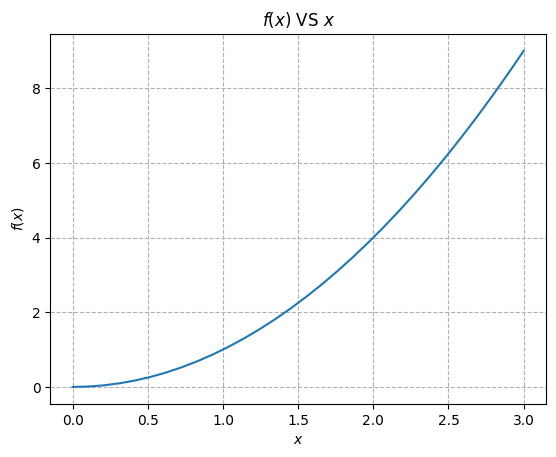

In [ ]:
f = lambda x:x**2

x = np.linspace(0,3,30)
y = f(x)

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("$f(x)$ VS $x$")
plt.plot(x,y)
plt.grid(linestyle="--")


integ = integral_trapz(f,0,3)
integ

In [ ]:
a = 0
b = 2
integ = integral_trapz(f,a,b,5)
integ

2.7200000000000006

[2.6668     2.66668045 2.66667156 2.66666915 2.66666816 2.66666767
 2.66666738 2.6666672  2.66666708 2.666667  ]


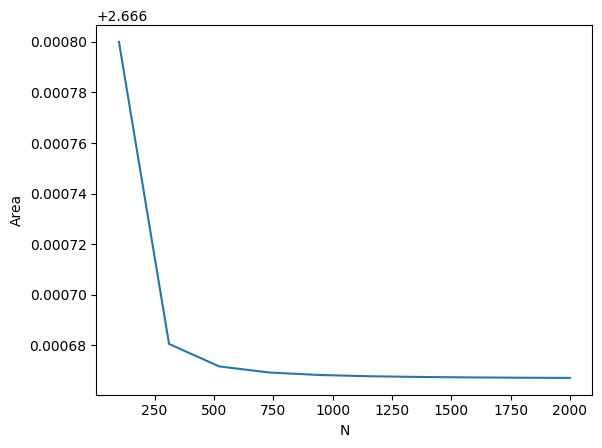

In [ ]:
N= np.linspace(100,2000,10)

areas = np.zeros(len(N))
for i,n in enumerate(N):
  areas[i] = integral_trapz(f,a,b,n)

plt.figure()
plt.xlabel("N")
plt.ylabel("Area")
plt.plot(N,areas)
print(areas)

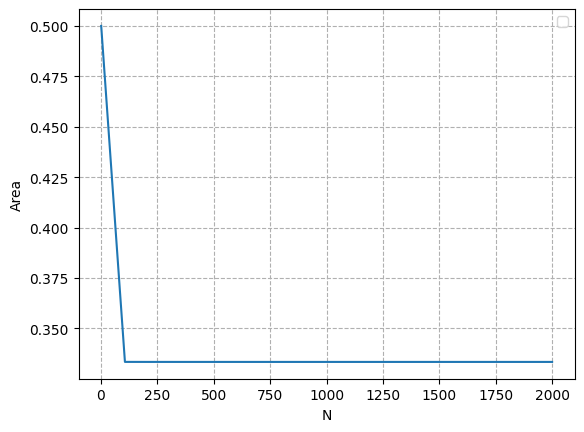

In [ ]:
N= np.linspace(1,2000,20)
a = 0
b = 2
areas_ = np.zeros(len(N))
areas = np.zeros(len(N))
for i,n in enumerate(N):
  areas[i] = integral_trapz(f,0,1,n)

plt.figure()
plt.xlabel("N")
plt.ylabel("Area")
plt.plot(N,areas)
plt.grid(linestyle="--")
plt.legend()

#Error método trapecio
Integrar la funcion con el método del trapecio y con un error específico

> Indented block



$f(x) =  \frac{(x-1)^2}{3}sin(x) +1$

$E = -\frac{(b-a)^3}{12n^2}f"(\xi)$


$f"(\xi)$ : $\xi$ es el máximo en la segunda derivada
$n^2 = -\frac{(b-a)^3}{12E}f"(\xi)$

In [ ]:
x = sp.Symbol("x")
f = (((x-1)**2)/3)*sp.sin(x) + 1

fp1 = sp.diff(f,x,1)
fp2 = sp.diff(f,x,2)

In [84]:
fun = sp.lambdify(x,f,'numpy')
f

(x - 1)**2*sin(x)/3 + 1

In [ ]:
fp1 #primera derivada

(x - 1)**2*cos(x)/3 + (2*x - 2)*sin(x)/3

In [ ]:
fp2 #segunda derivada

(-(x - 1)**2*sin(x) + 4*(x - 1)*cos(x) + 2*sin(x))/3

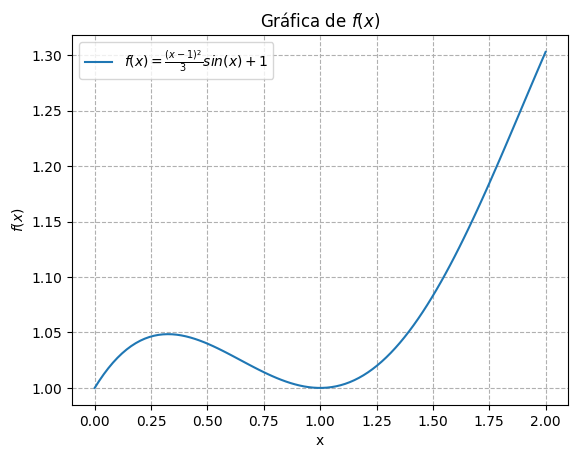

In [85]:
a = 0
b = 2
x_ = np.linspace(a,b,100)
y = fun(x_)

plt.plot(x_,y, label= r"$f(x) = \frac{(x-1)^2}{3}sin(x) +1$")
plt.title("Gráfica de $f(x)$")
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid(linestyle="--")

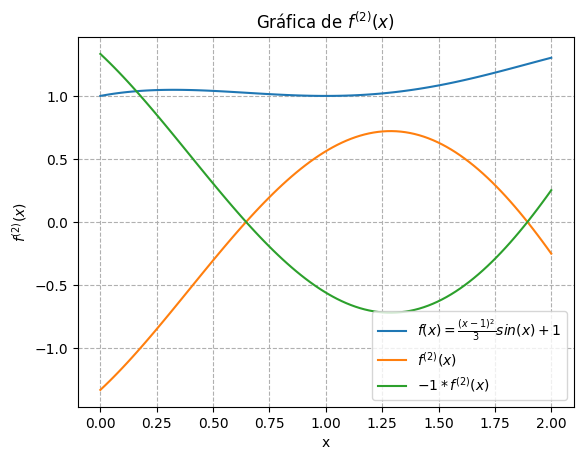

In [83]:
fp2_ = sp.lambdify(x,fp2,'numpy')

yp2 = fp2_(x_)
yp2_ = -1*yp2
plt.plot(x_,y, label= r"$f(x) = \frac{(x-1)^2}{3}sin(x) +1$")
plt.plot(x_,yp2, label= "$f^{(2)}(x)$")
plt.plot(x_,yp2_, label= "$-1*f^{(2)}(x)$")
plt.title("Gráfica de $f^{(2)}(x)$")
plt.xlabel("x")
plt.ylabel("$f^{(2)}(x)$")
plt.legend()
plt.grid(linestyle="--")

In [82]:
#utilizando optimize
q =lambda x: -fp2_(x)
min = sc.optimize.fmin_powell(q,1.28)[0]
min


Optimization terminated successfully.
         Current function value: -0.720789
         Iterations: 2
         Function evaluations: 37


1.2873169705151601

In [87]:
E = 1E-3
n2 = (((b-a)**3)/(12*E))*fp2_(min)
n = np.sqrt(n2)
print("Valor de n para que el error sea de E = ",E,", n = ",round(n))

Valor de n para que el error sea de E =  0.001 , n =  22


In [88]:
valor = integral_trapz(fun,a,b,n)
print("Valor de la Integral con n = ", round(n), ", Integral = ", valor)

Valor de la Integral con n =  22 , Integral =  2.1342512146604022


In [89]:
valor = integral_trapz(fun,a,b,10000)
print("Valor de la Integral con n = 10000, Integral = ", valor)

Valor de la Integral con n = 10000, Integral =  2.134149339481905
